1- how many birds arrive at salton sea each winter season
2- population trend during maximum population season
3- diversity trend each season
4- protected species and their trend
5- linear forecast

In [2]:
# jupyter nbextension enable jupyter_tabnine --py
# importing all the dependencies 
import pandas as pd
import numpy as np

# import data visualizing tools
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# docx file reading tools
import docx2txt
import textract
import sys

# import webscrapping tools
from urllib.request import urlretrieve
from bs4 import BeautifulSoup as bs

# import regular expression tools
import re
import string

# import date and time processing libraries
import datefinder
import datetime
import pickle
from statistics import mean
from pydoc import help
from scipy.stats.stats import pearsonr

In [3]:
pd.options.display.max_seq_items = 4000
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000

In [4]:
with open('birds_pickle.pkl', 'rb') as pickle_file:
    birds_df = pickle.load(pickle_file)
birds_df.index.name = 'date'
# birds_df = birds_df.sort_values(by = 'date')
birds_df['month'] = birds_df.index.strftime('%m').astype(int)
birds_df['year'] = birds_df.index.strftime('%m').astype(int)

In [5]:
birds_df['survey_sum'] = birds_df.sum(axis=1)
# birds_df = birds_df.set_index(['temp_low', 'temp_high', 'temp_mean', 'survey_sum'], level = 1)
# birds_df.iloc[:2]
birds_df = birds_df[birds_df['survey_sum'] > 5000]

In [6]:
winter_months_df = birds_df[(birds_df.index.month == 2)|(birds_df.index.month == 12)|(birds_df.index.month == 1)]
spring_months_df = birds_df[(birds_df.index.month == 3)|(birds_df.index.month == 4)|(birds_df.index.month == 5)]
summer_months_df = birds_df[(birds_df.index.month == 6)|(birds_df.index.month == 7)|(birds_df.index.month == 8)]
fall_months_df = birds_df[(birds_df.index.month == 9)|(birds_df.index.month == 10)|(birds_df.index.month == 11)]

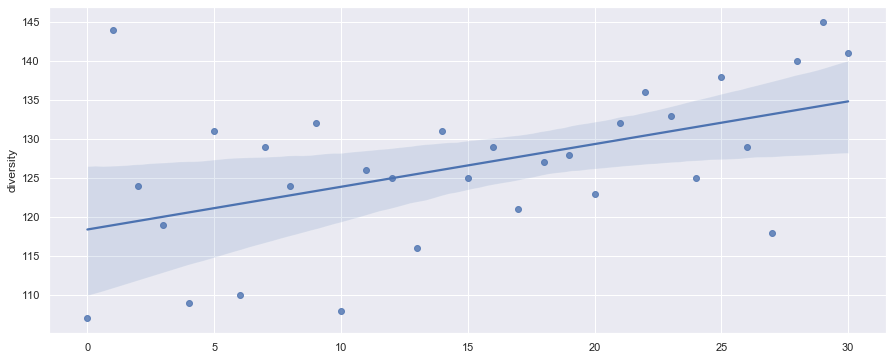

In [7]:
diversity_df = pd.DataFrame(spring_months_df.T.gt(0).sum()).rename(columns = {0:'diversity'})
diversity_df = diversity_df.reset_index()
diversity_df = diversity_df[diversity_df.diversity > 40]
sns.set(rc={'figure.figsize': (15,6)})
sns.regplot(x = diversity_df.index, y = 'diversity', data= diversity_df)
plt.xticks = diversity_df.date


In [8]:
def yearly_trend(bird):
    sns.set(rc={'figure.figsize': (6,6)})
    df = pd.DataFrame(birds_df[bird])
    
    df['month'] = df.index.strftime('%m').astype(int)


    def year_df(bird, year):
        bird_year = df[df.index.year == year]
        bird_year = bird_year.rename(columns = {bird_year.columns[0]:year})
        bird_year = bird_year.set_index('month')
        bird_year = bird_year.groupby('month').max()
        return bird_year
    
    y16 = year_df(bird = bird, year =2016).T
    y17 = year_df(bird = bird, year =2017).T
    y18 = year_df(bird = bird, year =2018).T
    y19 = year_df(bird = bird, year =2019).T
    y20 = year_df(bird = bird, year =2020).T
    
    ylist = [y16,y17,y18,y19,y20]
    
    ydf = pd.concat(ylist)
    ydf = ydf.T

    return ydf.plot(subplots = True,xticks = np.arange(1,13), title = bird)


In [9]:
month_data = birds_df.groupby(pd.Grouper(freq = 'M')).max()

def monthly_trend(bird):
    monthly_trend_bird = pd.DataFrame(month_data[bird])
    monthly_trend_bird['year'] = monthly_trend_bird.index.year
    month_list = []
    for m in range(1, 13):
        monthly_trend = monthly_trend_bird[monthly_trend_bird.index.month == m]
        monthly_trend = monthly_trend.rename(columns = {bird:monthly_trend.index.strftime('%B')[0]})
        monthly_trend = monthly_trend.set_index('year').T
        month_list.append(monthly_trend)
    month_df = pd.concat(month_list)
    month_df = pd.DataFrame(month_df).T
    month_df.plot(subplots= True, figsize=(5,10), title = bird, kind = 'line')
    plt.xticks = month_df.index

In [10]:
def temp_coorelation_plot(bird):
    sns.set(rc={'figure.figsize': (6,6)})
    pearson_constant = pearsonr(birds_df['temp_mean'], birds_df[bird])
    pearson_constant = f'pearson coefficient: {round(pearson_constant[0], 2)} '
    sns.lineplot(x=birds_df['temp_mean'] , y = birds_df[bird], label = pearson_constant)
    plt.xlabel('Temperature (F)')

In [11]:
birds_df

,Blue-winged Teal,Cinnamon Teal,Northern Shoveler,Gadwall,Mallard,Northern Pintail,Green-winged Teal,Ruddy Duck,Gambels Quail,Pied-billed Grebe,Eared Grebe,Western Grebe,Clarks Grebe,Rock Pigeon,Eurasian Collared-Dove,Inca Dove,Common Ground-Dove,White-winged Dove,Mourning Dove,Greater Roadrunner,Lesser Nighthawk,Black-chinned Hummingbird,Annas Hummingbird,Costas Hummingbird,Ridgways Rail,Virginia Rail,Sora,Common Gallinule,American Coot,Sandhill Crane,Black-necked Stilt,American Avocet,Black-bellied Plover,Snowy Plover,Semipalmated Plover,Killdeer,Long-billed Curlew,Marbled Godwit,Ruddy Turnstone,Stilt Sandpiper,Bairds Sandpiper,Least Sandpiper,Pectoral Sandpiper,Western Sandpiper,Western Sandpipers,Long-billed Dowitcher,Wilsons Snipe,Spotted Sandpiper,Lesser Yellowlegs,Willet,Greater Yellowlegs,Wilsons Phalarope,Red-necked Phalarope,Parasitic Jaeger,Laughing Gull,Ring-billed Gull,Western Gull,Yellow-footed Gull,California Gull,Herring Gull,Caspian Tern,Black Tern,Forsters Tern,Black Skimmer,Neotropic Cormorant,Double-crested Cormorant,American White Pelican,Brown Pelican,Least Bittern,Great Blue Heron,Great Egret,Snowy Egret,Cattle Egret,Green Heron,Black-crowned Night-Heron,White-faced Ibis,Turkey Vulture,Osprey,White-tailed Kite,Northern Harrier,Coopers Hawk,Red-tailed Hawk,Great Horned Owl,Burrowing Owl,Gila Woodpecker,Ladder-backed Woodpecker,American Kestrel,Western Wood-Pewee,Willow Flycatcher,Western Flycatcher,Black Phoebe,Vermilion Flycatcher,Western Kingbird,Loggerhead Shrike,Warbling Vireo,Common Raven,Purple Martin,Tree Swallow,Northern Rough-winged Swallow,Bank Swallow,Cliff Swallow,Barn Swallow,Verdin,House Wren,Marsh Wren,Blue-gray Gnatcatcher,Black-tailed Gnatcatcher,Northern Mockingbird,European Starling,House Sparrow,House Finch,Lesser Goldfinch,Aberts Towhee,Chipping Sparrow,Savannah Sparrow,Song Sparrow,Yellow-headed Blackbird,Western Meadowlark,Bullocks Oriole,Red-winged Blackbird,Brown-headed Cowbird,Brewers Blackbird,Great-tailed Grackle,Orange-crowned Warbler,Nashville Warbler,Common Yellowthroat,Yellow Warbler,Black-throated Gray Warbler,Wilsons Warbler,Western Tanager,Black-headed Grosbeak,temp_low,temp_high,temp_mean,American Wigeon,Redhead,Red-shouldered Hawk,Gull-billed Tern,Roadrunner,Says Phoebe,Ash-throated Flycatcher,Horned Lark,Phainopepla,Blue Grosbeak,Bronzed Cowbird,Greater White-fronted Goose,Snow Goose,Rosss Goose,Canvasback,Ring-necked Duck,Greater Scaup,Lesser Scaup,Bufflehead,Hooded Merganser,Red-breasted Merganser,Sharp-shinned Hawk,Ferruginous Hawk,Belted Kingfisher,Northern Flicker,Merlin,Peregrine Falcon,Rock Wren,Ruby-crowned Kinglet,American Pipit,White-crowned Sparrow,Lincolns Sparrow,Yellow-rumped Warbler,Ruff,Dunlin,Bonapartes Gull,Franklins Gull,Red-naped Sapsucker,American Robin,Cedar Waxwing,Dark-eyed Junco,American Redstart,Solitary Sandpiper,Rufous Hummingbird,Pacific-slope Flycatcher,Cassins Vireo,Lucys Warbler,Gillivrays Warbler,Hermit Warbler,Yellow-breasted Chat,Black-throated Sparrow,Lazuli Bunting,Whimbrel,Short-billed Dowitcher,Reddish Egret,Canada Goose,Flicker,Bells Vireo,Western Bluebird,Golden-crowned Sparrow,Hooded Oriole,American Bittern,Common Tern,Cactus Wren,Townsends Warbler,Red Knot,Lesser Black-backed Gull,Vauxs Swift,Calliope Hummingbird,Sanderling,Common Loon,Barn Owl,Hammonds Flycatcher,Swainsons Thrush,Brown Thrasher,Summer Tanager,Brant,Surf Scoter,Common Goldeneye,Horned Grebe,Heermanns Gull,Rough-winged Swallow,Lark Sparrow,Common Merganser,Mountain Plover,Prairie Falcon,Harriss Sparrow,Cackling Goose,Ring-necked Pheasant,Hermit Thrush,Tundra Swan,Semipalmated Sandpiper,Mew Gull,Mountain Bluebird,Vesper Sparrow,Bells Sparrow,Glaucous-winged Gull,Violet-green Swallow,Sage Thrasher,Yellow-billed Cuckoo,Pine Siskin,Olive-sided Flycatcher,Greater Lesser Scaup,Thayers Gull,Bald Eagle,Brewers Sparrow,Little Blue Heron,Sabines Gull,Red-breasted Nuthatch,Great Burrowing Owl,American Wigeon Mallard,American Golden-Plover,Roseate Spoonbill,Ridgeways Rail

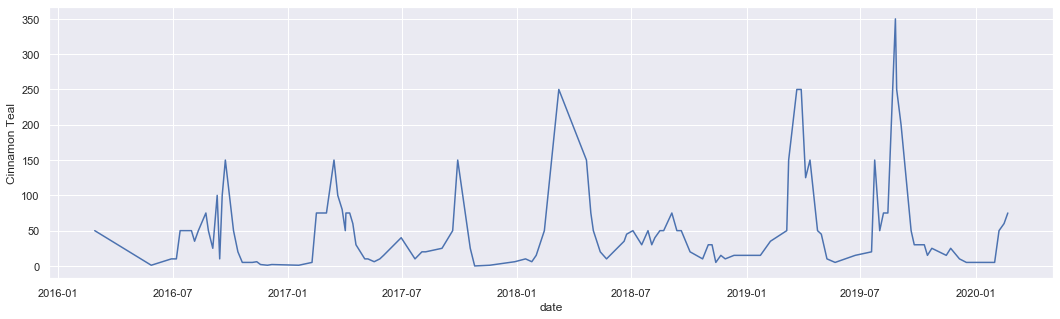

In [12]:
def all_survey_count(bird):
    x= birds_df.index
    x_arr = np.arange(len(birds_df.index))
    plt.figure(figsize= (18,5))
    sns.lineplot(x=x, y = bird, data = birds_df)
#    sns.regplot(x=x_arr, y = bird, data = birds_df)

   
all_survey_count('Cinnamon Teal')


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7feedf5f7250>,
      dtype=object)

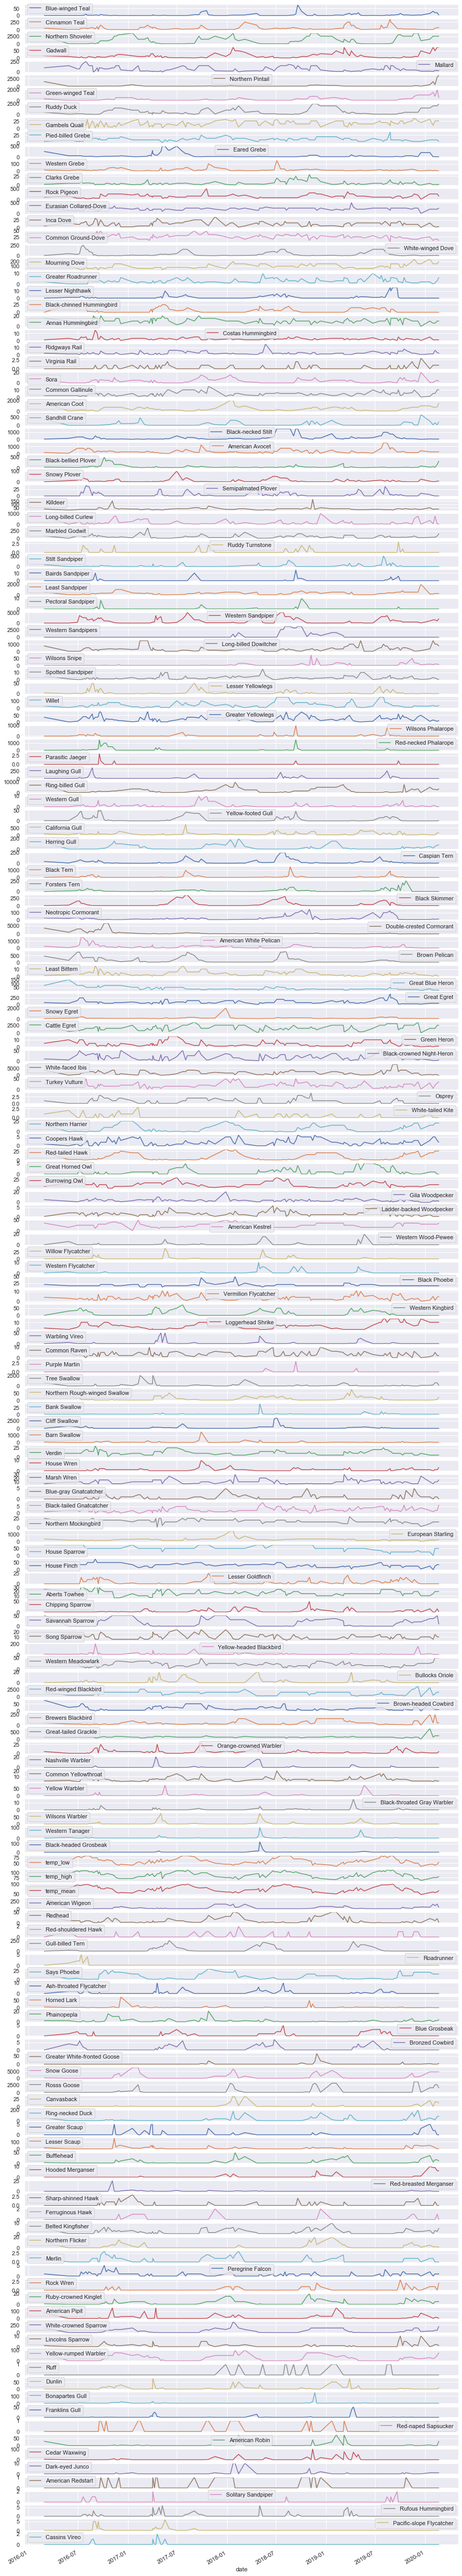

In [13]:
def overview_plot(si, ei):
    sns.set(rc={'figure.figsize': (15,100)})
    return birds_df[birds_df.columns[si:ei]].plot(subplots= True, legend = True)
   
overview_plot(si = 0, ei = 180)

In [14]:
def plot(bird_name):
    subject = birds_df.columns
    for sub in subject:
        if re.findall(rf"{bird_name}", sub, re.IGNORECASE):
            bird = sub
            print(bird)
            temp_coorelation_plot(bird= bird) 
            yearly_trend(bird = bird)
            all_survey_count(bird = bird)
            monthly_trend(bird = bird)

Ruddy Duck


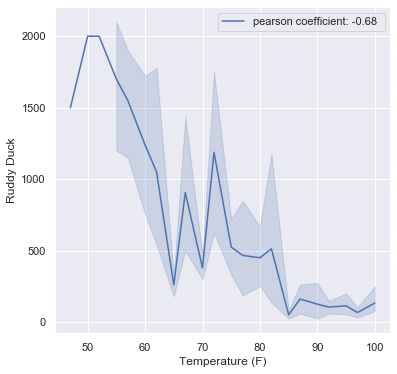

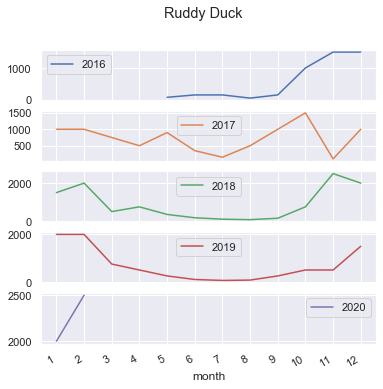

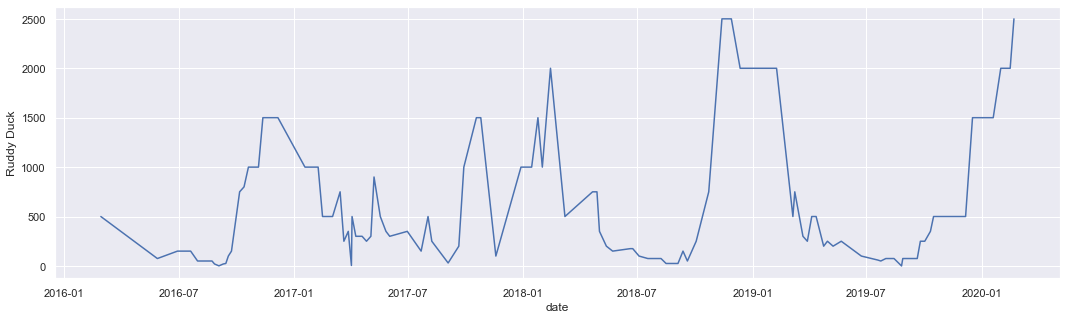

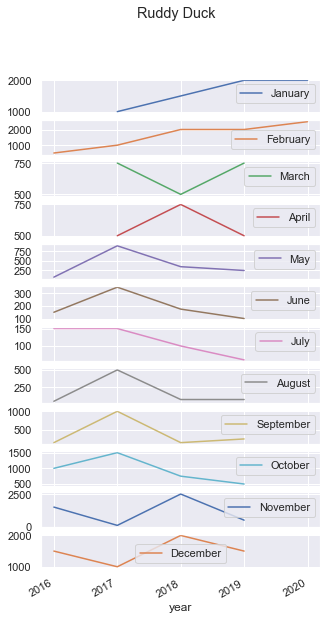

In [16]:
plot(bird_name = "ruddy Duck")

In [55]:
year_max_df = birds_df.groupby(birds_df.index.year).max()
duck_df = year_max_df[duck_list]
duck_df['total'] = duck_df.sum(axis = 1)
duck_df

/home/jawwad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Cinnamon Teal,Northern Shoveler,Gadwall,Mallard,Northern Pintail,Green-winged Teal,Redhead,Blue-winged Teal,American Wigeon,Canvasback,Ring-necked Duck,Greater Lesser Scaup,total
date,,,,,,,,,,,,,
2016,150,3000,25,250,1500,500,35,9,350,3,50,2,5874
2017,150,3500,35,150,500,500,35,35,150,6,40,0,5101
2018,250,3500,75,175,450,750,50,75,150,35,175,0,5685
2019,350,3500,75,150,250,1000,50,20,100,8,200,0,5703
2020,75,2500,75,35,3500,2000,20,30,150,20,85,0,8490


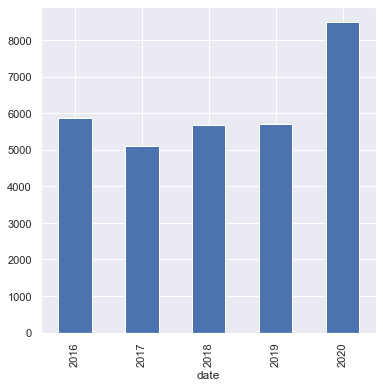

In [56]:
duck_df.total.plot(kind= 'bar')

In [53]:
for sub in birds_df.columns:
    if re.findall(rf"sc", sub, re.IGNORECASE):
        print(sub)

Greater Scaup
Lesser Scaup
Surf Scoter
Greater Lesser Scaup
Black Scoter


In [54]:
duck_list = ['Cinnamon Teal', 'Northern Shoveler','Gadwall', 'Mallard', 'Northern Pintail',
             'Green-winged Teal', 'Redhead', 'Blue-winged Teal',
            'American Wigeon', 'Canvasback', 'Ring-necked Duck', 'Greater Lesser Scaup']

In [45]:
duck_list

['Cinnamon Teal',
 'Northern Shoveler',
 'Gadwall',
 'Mallard',
 'Northern Pintail',
 'Green-winged Teal',
 'Green-winged Teal',
 'Redhead',
 'Blue-winged Teal',
 'American Wigeon',
 'Canvasback',
 'Ring-necked Duck']